In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.5 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
import sys
import time
import traceback
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dengue = '/content/drive/MyDrive/Diplom/final data/dengue virus type 3_7860.fasta'
japanese_encephalitis = '/content/drive/MyDrive/Diplom/final data/japanese encephalitis_3413.fasta'
zika = '/content/drive/MyDrive/Diplom/final data/zika_2476.fasta'
west_nile = '/content/drive/MyDrive/Diplom/final data/west nile_3483.fasta'
yellow_fever = '/content/drive/MyDrive/Diplom/final data/yellow fever_1974.fasta'

In [ ]:
def extract_random_fragment(seq, fragment_length):
    seq_length = len(seq)
    if seq_length <= fragment_length:
        return seq
    else:
        start_index = random.randint(0, seq_length - fragment_length)
        return seq[start_index:start_index + fragment_length]

In [ ]:
def process_fasta_file(file_path, label, fragment_length):
    counter = 0
    for seq_record in SeqIO.parse(file_path, "fasta"):
        fragment = extract_random_fragment(str(seq_record.seq), fragment_length)
        sequences.append(fragment)
        labels.append(label)
        counter += 1
    return counter

In [ ]:
fragment_length = 500
sequences = []
labels = []

dengue_count = process_fasta_file(dengue, 0, fragment_length)
japanese_encephalitis_count = process_fasta_file(japanese_encephalitis, 1, fragment_length)
zika_count = process_fasta_file(zika, 2, fragment_length)
west_nile_count = process_fasta_file(west_nile, 3, fragment_length)
yellow_fever_count = process_fasta_file(yellow_fever, 4, fragment_length)

# Check the results
print("Number of sequences:", len(sequences))
print("Number of labels:", len(labels))
print("Example sequence:", sequences[0])
print("Example label:", labels[0])

Number of sequences: 19202
Number of labels: 19202
Example sequence: ATAACACCCCAGGCATCAACCGTCGAAGCCATCTTACCTGAATATGGAACCCTTGGGCTAGAATGCTCACCACGGACAGGTTTGGATTTCAATGAAATGATTTTGTTGACAATGAAGAACAAAGCATGGATGGTACACAGACAATGGTTTTTTGACCTACCTCTACCATGGACATCAGGGGCTACAACAGAAACACCAACCTGGAATAAGAAAGAGCTTCTCGTGACATTCAAAAACGCACACGCAAAAAAACAAGAAGTAGTAGTCCTTGGATCGCAAGAGGGAGCAATGCACACAGCACTGACAGGAGCTACAGAGATCCAAACCTCAGGAGGCACAAGTATTTTTGCGGGGCACTTGAAATGCAGACTCAAGATGGACAAATTGGAACTCAAGGGGATGAGCTATGCAATGTGCTCGAATGCCTTTGTGTTGAAGAAAGAAGTCTCTGAAACACAACATGGGACAATACTCATTAAGGTCGAGTACAAAGGGGAAGA
Example label: 0


In [ ]:
def plot_sample_distribution(dengue_count, japanese_encephalitis_count, zika_count, west_nile_count, yellow_fever_count):
    # Define the labels and counts
    labels = ['Dengue', 'Japanese Encephalitis', 'Zika', 'West Nile', 'Yellow Fever']
    counts = [dengue_count, japanese_encephalitis_count, zika_count, west_nile_count, yellow_fever_count]

    # Create the histogram
    plt.figure(figsize=(10, 6))
    plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.xlabel('Virus')
    plt.ylabel('Number of Samples')
    plt.title('Sample Distribution of Each Virus')
    plt.grid(axis='y')

    # Display the counts on top of the bars
    for i, count in enumerate(counts):
        plt.text(i, count + 5, str(count), ha='center', va='bottom')

    plt.show()

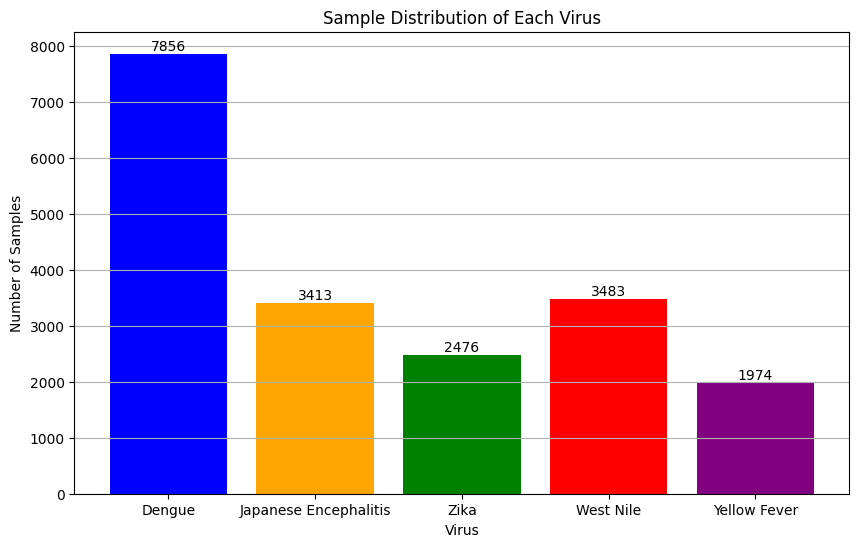

In [ ]:
plot_sample_distribution(dengue_count, japanese_encephalitis_count, zika_count, west_nile_count, yellow_fever_count)

In [ ]:
sequences[0]

'ATAACACCCCAGGCATCAACCGTCGAAGCCATCTTACCTGAATATGGAACCCTTGGGCTAGAATGCTCACCACGGACAGGTTTGGATTTCAATGAAATGATTTTGTTGACAATGAAGAACAAAGCATGGATGGTACACAGACAATGGTTTTTTGACCTACCTCTACCATGGACATCAGGGGCTACAACAGAAACACCAACCTGGAATAAGAAAGAGCTTCTCGTGACATTCAAAAACGCACACGCAAAAAAACAAGAAGTAGTAGTCCTTGGATCGCAAGAGGGAGCAATGCACACAGCACTGACAGGAGCTACAGAGATCCAAACCTCAGGAGGCACAAGTATTTTTGCGGGGCACTTGAAATGCAGACTCAAGATGGACAAATTGGAACTCAAGGGGATGAGCTATGCAATGTGCTCGAATGCCTTTGTGTTGAAGAAAGAAGTCTCTGAAACACAACATGGGACAATACTCATTAAGGTCGAGTACAAAGGGGAAGA'

In [ ]:
labels[0]

0

In [ ]:
def prepare_data(seqs):
    max_len = 0
    voc2ind = {voc:ind for ind,voc in enumerate(['<pad>', '<unk>'])}
    i = len(voc2ind)

    tokenized_seqs = []
    for seq in seqs:
        tokenized_seq = []
        for e in seq:
            # make sure the sequence is upper case, a == A
            seq = seq.upper()
            # if we haven't seen this letter before, add to the corupus
            if not e in voc2ind:
                voc2ind[e] = i
                i += 1
            tokenized_seq.append(voc2ind[e])
        tokenized_seqs.append(tokenized_seq)

    return tokenized_seqs, voc2ind

In [ ]:
def pad(tokenized_seqs, voc2ind):

    padded_seqs = []

    # find max sequence length
    max_len = 0
    for seq in tokenized_seqs:
        max_len = max(len(seq), max_len)

    # add padding so sequences are max_length
    for seq in tokenized_seqs:
        padded_seq = seq + [voc2ind['<pad>']] * (max_len - len(seq))
        padded_seqs.append(padded_seq)

    return np.array(padded_seqs, dtype=np.float32)

In [ ]:
token_seq, voc2ind = prepare_data(sequences)
padded_secs = pad(token_seq, voc2ind)
print(sequences[0])
print("\n", token_seq[0], "\n\n", voc2ind, "\n\n", padded_secs[0])

ATAACACCCCAGGCATCAACCGTCGAAGCCATCTTACCTGAATATGGAACCCTTGGGCTAGAATGCTCACCACGGACAGGTTTGGATTTCAATGAAATGATTTTGTTGACAATGAAGAACAAAGCATGGATGGTACACAGACAATGGTTTTTTGACCTACCTCTACCATGGACATCAGGGGCTACAACAGAAACACCAACCTGGAATAAGAAAGAGCTTCTCGTGACATTCAAAAACGCACACGCAAAAAAACAAGAAGTAGTAGTCCTTGGATCGCAAGAGGGAGCAATGCACACAGCACTGACAGGAGCTACAGAGATCCAAACCTCAGGAGGCACAAGTATTTTTGCGGGGCACTTGAAATGCAGACTCAAGATGGACAAATTGGAACTCAAGGGGATGAGCTATGCAATGTGCTCGAATGCCTTTGTGTTGAAGAAAGAAGTCTCTGAAACACAACATGGGACAATACTCATTAAGGTCGAGTACAAAGGGGAAGA

 [2, 3, 2, 2, 4, 2, 4, 4, 4, 4, 2, 5, 5, 4, 2, 3, 4, 2, 2, 4, 4, 5, 3, 4, 5, 2, 2, 5, 4, 4, 2, 3, 4, 3, 3, 2, 4, 4, 3, 5, 2, 2, 3, 2, 3, 5, 5, 2, 2, 4, 4, 4, 3, 3, 5, 5, 5, 4, 3, 2, 5, 2, 2, 3, 5, 4, 3, 4, 2, 4, 4, 2, 4, 5, 5, 2, 4, 2, 5, 5, 3, 3, 3, 5, 5, 2, 3, 3, 3, 4, 2, 2, 3, 5, 2, 2, 2, 3, 5, 2, 3, 3, 3, 3, 5, 3, 3, 5, 2, 4, 2, 2, 3, 5, 2, 2, 5, 2, 2, 4, 2, 2, 2, 5, 4, 2, 3, 5, 5, 2, 3, 5, 5, 3, 2, 4, 2, 4, 2, 5, 2, 4, 2, 2, 3, 5, 5, 3, 3, 3, 3, 3, 3, 5, 2, 4, 4, 3, 2, 4, 4, 3, 4, 3, 2, 4

In [ ]:
data_tokenized = pd.DataFrame(padded_secs)
data_tokenized['label'] = labels

In [ ]:
data_tokenized

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,label
0,2.0,3.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,4.0,...,2.0,5.0,5.0,5.0,5.0,2.0,2.0,5.0,2.0,0
1,2.0,5.0,2.0,2.0,5.0,3.0,4.0,5.0,5.0,5.0,...,5.0,3.0,2.0,5.0,2.0,5.0,2.0,4.0,2.0,0
2,3.0,3.0,2.0,2.0,2.0,4.0,5.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5.0,2.0,2.0,2.0,4.0,5.0,4.0,5.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4.0,5.0,4.0,5.0,4.0,5.0,2.0,5.0,2.0,2.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19197,2.0,2.0,5.0,5.0,4.0,3.0,3.0,3.0,4.0,2.0,...,5.0,3.0,5.0,5.0,2.0,3.0,5.0,5.0,5.0,4
19198,5.0,3.0,3.0,2.0,4.0,2.0,5.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
19199,4.0,4.0,4.0,2.0,4.0,4.0,2.0,3.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
19200,5.0,5.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
data_tokenized.to_csv('/content/drive/My Drive/Diplom/data_tokenized_19202_500.csv', index=False)

In [ ]:
df_verify = pd.read_csv('/content/drive/My Drive/Diplom/data_tokenized_19202_500.csv')
print(df_verify)

         0    1    2    3    4    5    6    7    8    9  ...  491  492  493  \
0      2.0  3.0  2.0  2.0  4.0  2.0  4.0  4.0  4.0  4.0  ...  2.0  5.0  5.0   
1      2.0  5.0  2.0  2.0  5.0  3.0  4.0  5.0  5.0  5.0  ...  5.0  3.0  2.0   
2      3.0  3.0  2.0  2.0  2.0  4.0  5.0  4.0  5.0  4.0  ...  0.0  0.0  0.0   
3      5.0  2.0  2.0  2.0  4.0  5.0  4.0  5.0  4.0  5.0  ...  0.0  0.0  0.0   
4      4.0  5.0  4.0  5.0  4.0  5.0  2.0  5.0  2.0  2.0  ...  5.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
19197  2.0  2.0  5.0  5.0  4.0  3.0  3.0  3.0  4.0  2.0  ...  5.0  3.0  5.0   
19198  5.0  3.0  3.0  2.0  4.0  2.0  5.0  5.0  5.0  5.0  ...  0.0  0.0  0.0   
19199  4.0  4.0  4.0  2.0  4.0  4.0  2.0  3.0  4.0  5.0  ...  0.0  0.0  0.0   
19200  5.0  5.0  2.0  2.0  3.0  3.0  4.0  2.0  4.0  3.0  ...  0.0  0.0  0.0   
19201  4.0  4.0  4.0  2.0  4.0  4.0  2.0  3.0  4.0  5.0  ...  0.0  0.0  0.0   

       494  495  496  497  498  499  label  
0     